In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.io import loadmat

%matplotlib inline

In [ ]:
DATAPATH_1 = 'ex6data1.mat'
DATAPATH_2 = 'ex6data2.mat'
DATAPATH_3 = 'ex6data3.mat'

DATA_SPAM_TRAIN = 'spamTrain.mat'
DATA_SPAM_TEST = 'spamTest.mat'


In [ ]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
  plt.rcParams['figure.figsize'] = (10., 7.)

  pos = y[:, 0] == 1
  neg = y[:, 0] == 0

  if axes == None:
    axes = plt.gca()

  axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='#003f5c', s=50, linewidth=2, label=pos_label)
  axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='#ffa600', s=50, linewidth=2, label=neg_label)

  axes.set_xlim([xmin, xmax])
  axes.set_ylim([ymin, ymax])

  axes.set_xlabel(xlabel, fontsize=12)
  axes.set_ylabel(ylabel, fontsize=12)

  axes.legend(bbox_to_anchor=(1,1), fancybox = True)

# SVM with small regularization parameter

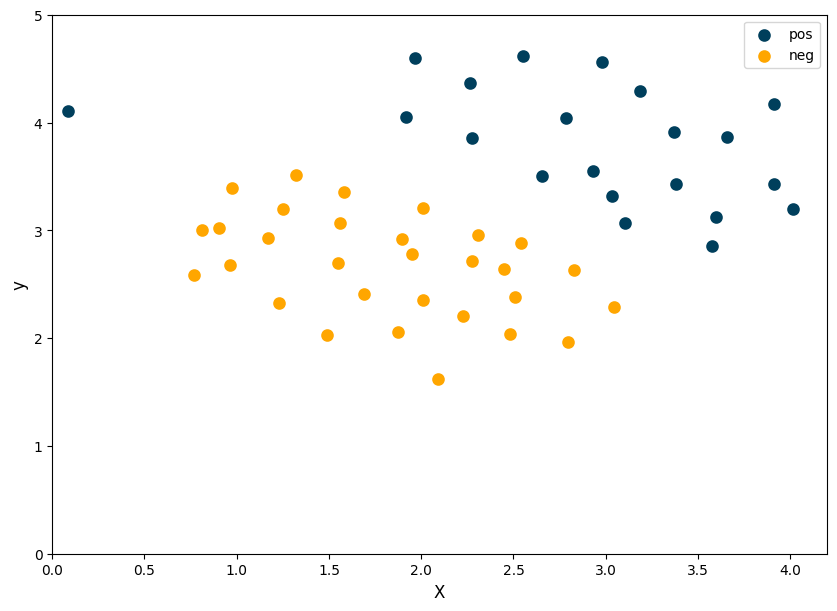

In [ ]:
data1 = loadmat(DATAPATH_1)

X = data1['X']
y = data1['y']

plot_data(X, y, 'X', 'y', 'pos', 'neg', 0, 4.2, 0, 5)

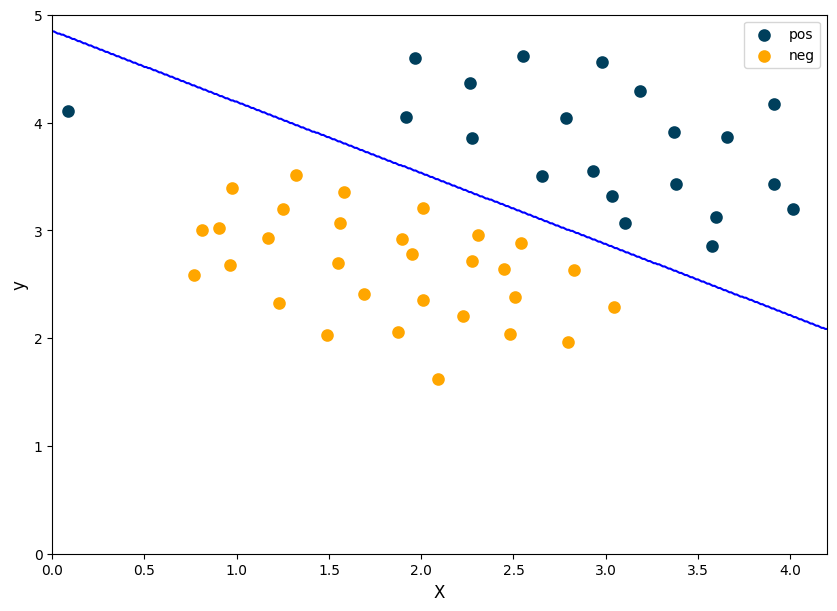

In [ ]:
from sklearn import svm

# use C=1
clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
clf.fit(X, y.ravel())

# plot data and boundary
plot_data(X, y, 'X', 'y', 'pos', 'neg', 0, 4.2, 0, 5)
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# SVM with large regularization par

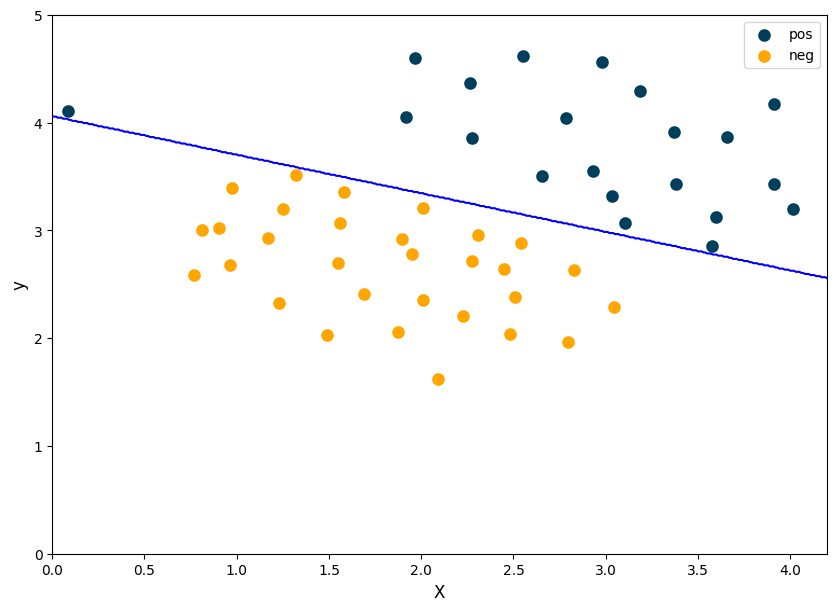

In [ ]:
# use C=100
clf = svm.SVC(kernel='linear', C=100.0, decision_function_shape='ovr')
clf.fit(X, y.ravel())

# plot data and boundary
plot_data(X, y, 'X', 'y', 'pos', 'neg', 0, 4.2, 0, 5)
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# SVM with non-linear boundary

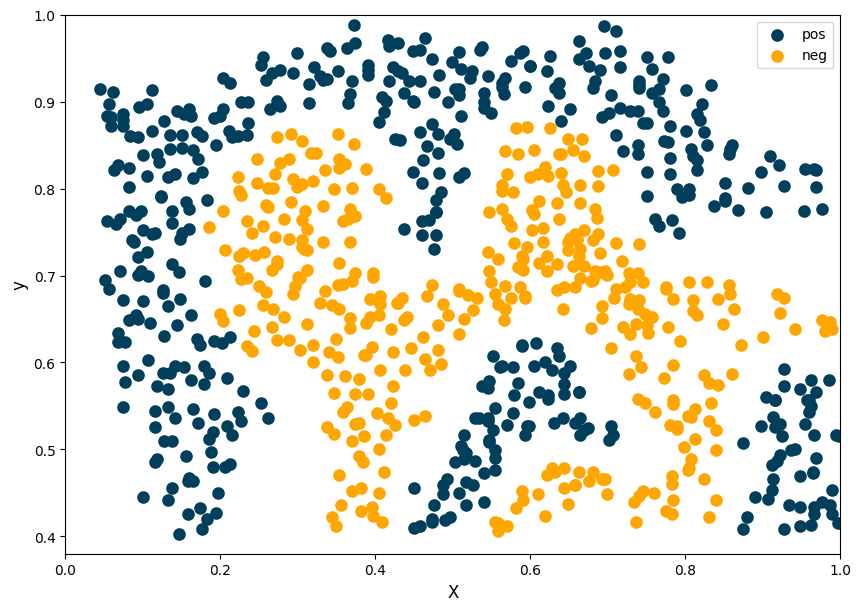

In [ ]:
data2 = loadmat(DATAPATH_2)

X_2 = data2['X']
y_2 = data2['y']

plot_data(X_2, y_2, 'X', 'y', 'pos', 'neg', 0, 1, 0.38, 1)

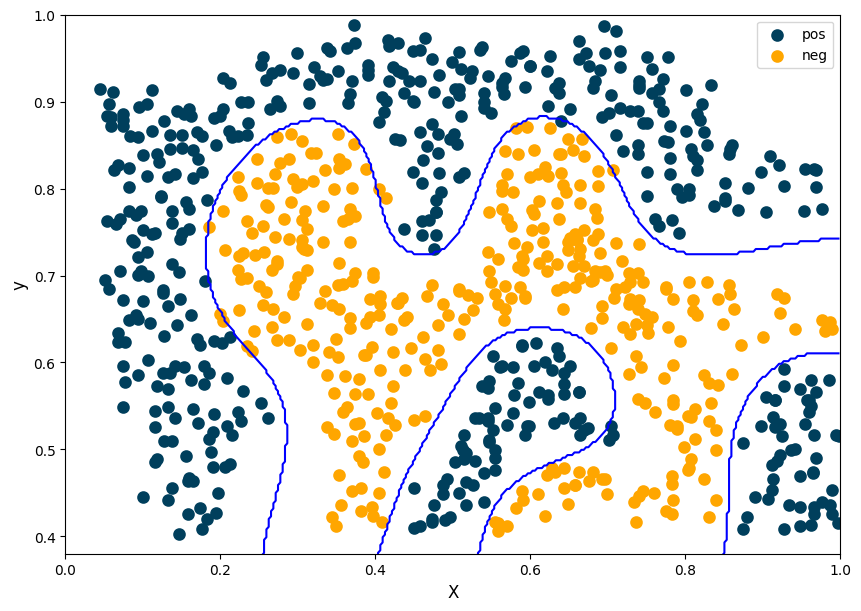

In [ ]:
sigma = 0.1
gamma = 1/(2*sigma**2)

clfg = svm.SVC(kernel = 'rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X_2, y_2.ravel())

# plot data and boundary
plot_data(X_2, y_2, 'X', 'y', 'pos', 'neg', 0, 1, 0.38, 1)
x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.0, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# SVM with cross-validation

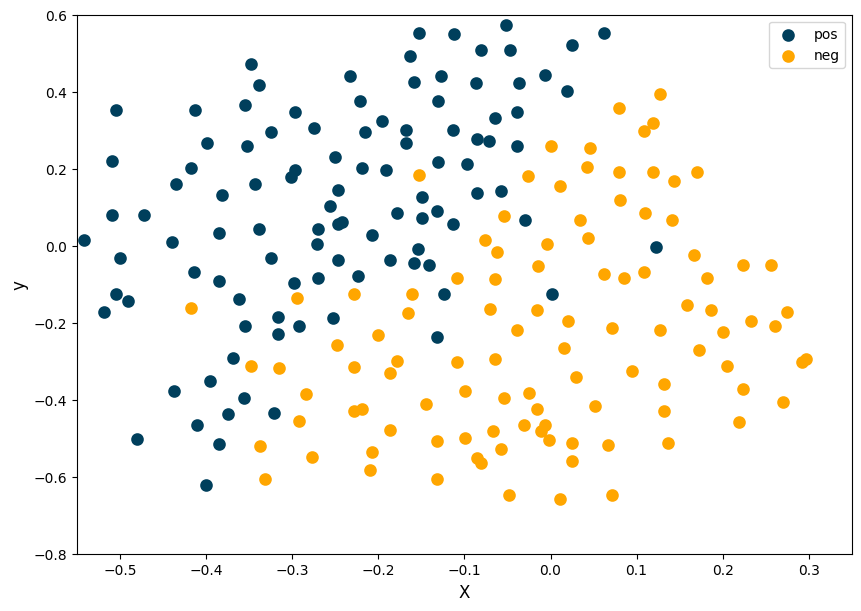

In [ ]:
data3 = loadmat(DATAPATH_3)

X_3 = data3['X']
y_3 = data3['y']

plot_data(X_3, y_3, 'X', 'y', 'pos', 'neg', -0.55, 0.35, -0.8, 0.6)

In [23]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
  for each_c in C:
    clf = svm.SVC(kernel='rbf', gamma=1/(2*each**2), C=each_c, decision_function_shape='ovr')

    clf.fit(X_3, y_3.ravel())
    errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
    sigma_c.append((each, each_c))

In [24]:
index = np.argmax(errors)
sigma_max, c_max = sigma_c[index]

print(f"The optimal value of sigma is: {sigma_max}")
print(f"The optimal value of C is: {c_max}")

The optimal value of sigma is: 0.1
The optimal value of C is: 1


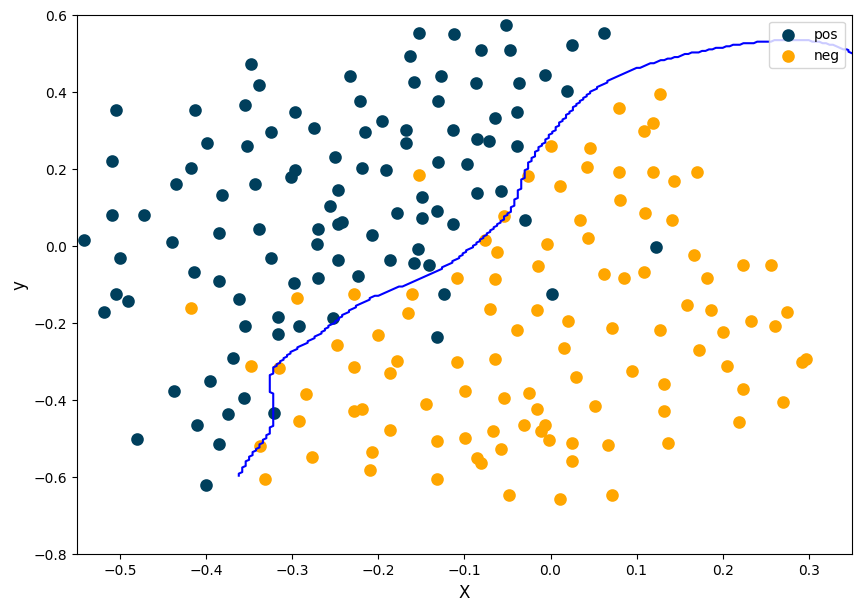

In [27]:
sigma = 0.1
gamma = 1/(2*sigma**2)

optimal_clf = svm.SVC(kernel = 'rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

# plot data and boundary
plot_data(X_3, y_3, 'X', 'y', 'pos', 'neg', -0.55, 0.35, -0.8, 0.6)
x_1, x_2 = np.meshgrid(np.arange(-0.6, 1, 0.004), np.arange(-0.6, 1, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')

# Spam classification

In [30]:
spam_train = loadmat(DATA_SPAM_TRAIN)
spam_test = loadmat(DATA_SPAM_TEST)

C = 0.1

X_train = spam_train['X']
y_train = spam_train['y']

X_test = spam_test['Xtest']
y_test = spam_test['ytest']


clf_spam = svm.SVC(kernel = 'linear', C=C, decision_function_shape='ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc =  clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy = {train_acc * 100}')
print(f'Test accuracy = {test_acc * 100}')

Training accuracy = 99.825
Test accuracy = 98.9
